In [1]:
import evaluation 
import importlib
importlib.reload(evaluation)

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


<module 'evaluation' from '/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py'>

In [2]:
from shallow_models.shallow_ensembles import BootstrapEnsemble as ShallowBootstrap
import shallow_models
importlib.reload(shallow_models)

<module 'shallow_models' from '/Users/thomas/Documents/Master-Thesis/new_version/shallow_models/__init__.py'>

In [3]:
import ensembles
import networks
import dataset_creation
import tensorflow as tf
#from shallow_models.shallow_ensembles import BootstrapEnsemble as ShallowBootstrap

In [5]:
trials = 3

num_neurons = [[10,10,10],[5,10,5]]#[10,5,10]]
seeds = [50,100,150,200]
num_layers = len(num_neurons[0])
learning_rates = [0.1,0.01,0.001]
activations = [[tf.nn.tanh]*num_layers,[tf.nn.leaky_relu]*num_layers, [tf.sigmoid]*num_layers]
initialisation_schemes = [tf.keras.initializers.he_normal, tf.contrib.layers.xavier_initializer] 
param_grid = {'num_neurons': num_neurons,
              'activations':activations,
             'initialisation_scheme':initialisation_schemes,
             'learning_rate':learning_rates,
             'seed':seeds,
             'l2':[True,False]
             }
             
    
    

In [6]:
tg = evaluation.ThompsonGridSearch(param_grid=param_grid, dataset_creator=dataset_creation.LinearDataset, 
                                   thompson_model=ensembles.BootstrapEnsemble,
                                   test_model=ensembles.BootstrapEnsemble)

initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>


288
288
288


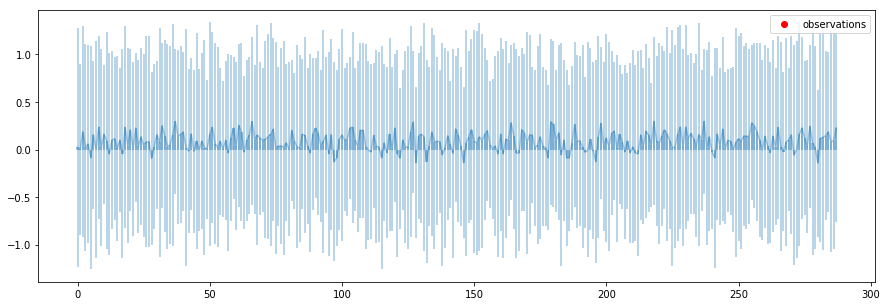

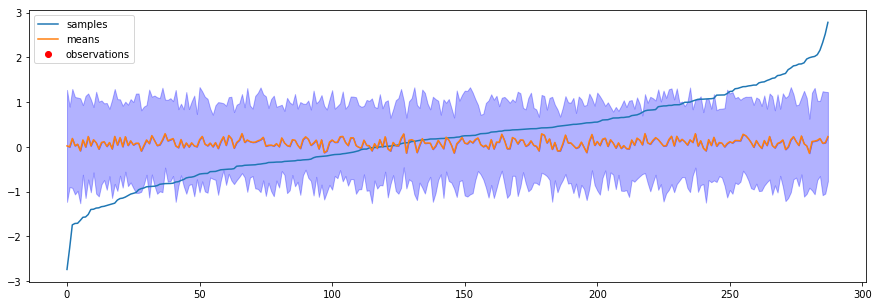

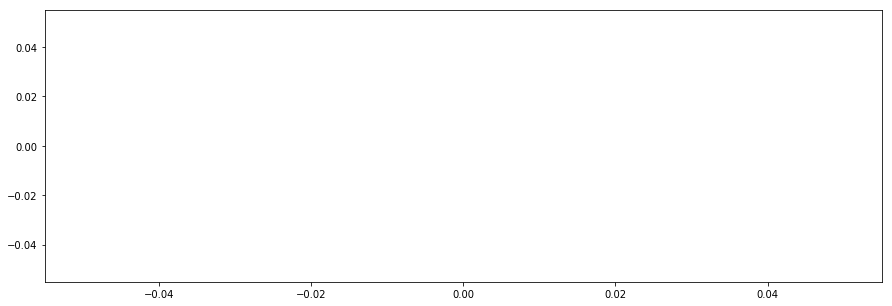

In [7]:
tg.plot_sample_grid()

In [8]:
tg.goforit(5)

initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
initialising Network <class 'base.Ensemb

288
288
288


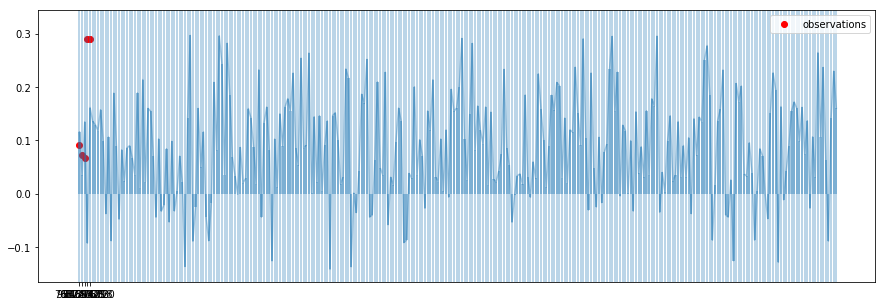

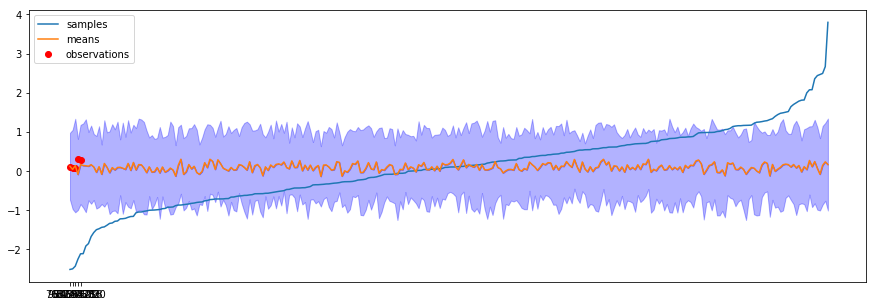

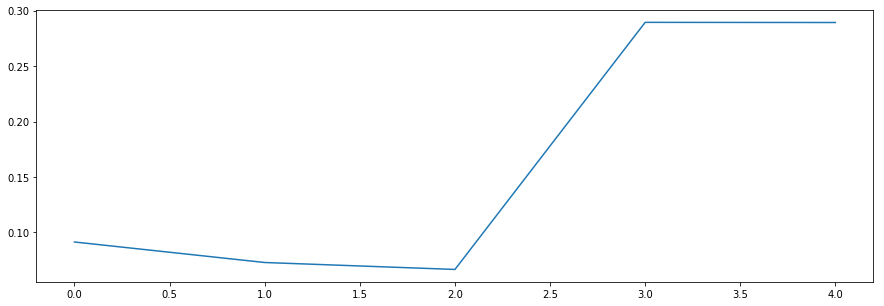

In [9]:
tg.plot_sample_grid()

Bootstrap

In [10]:
tg2 = evaluation.ThompsonGridSearch(param_grid=param_grid, dataset_creator=dataset_creation.LinearDataset, 
                                    thompson_model=networks.DropoutNetwork,
                 test_model=ensembles.ForcedDiversityBootstrapThroughTime3)#networks.DropoutNetwork)#LrNetwork)

initialising Network <class 'networks.DropoutNetwork'>


288
288
288


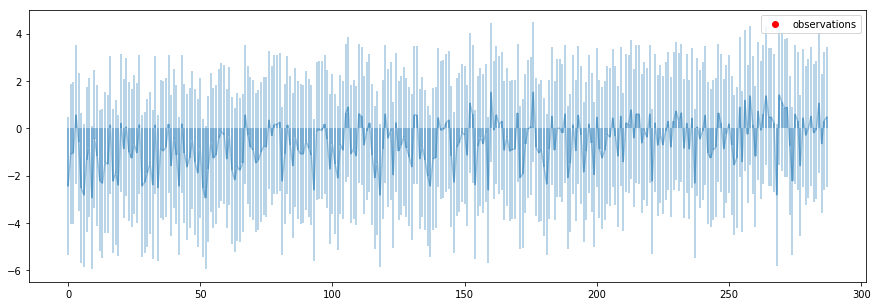

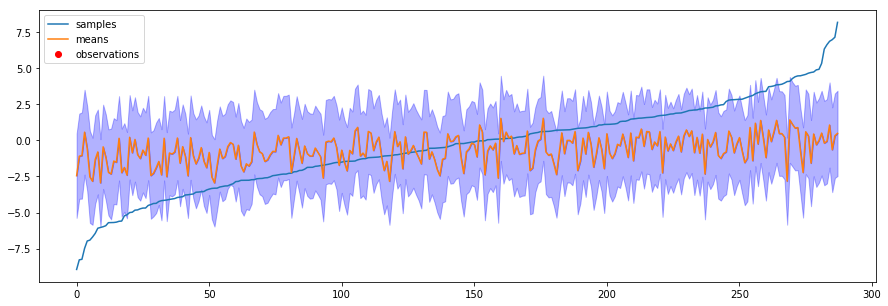

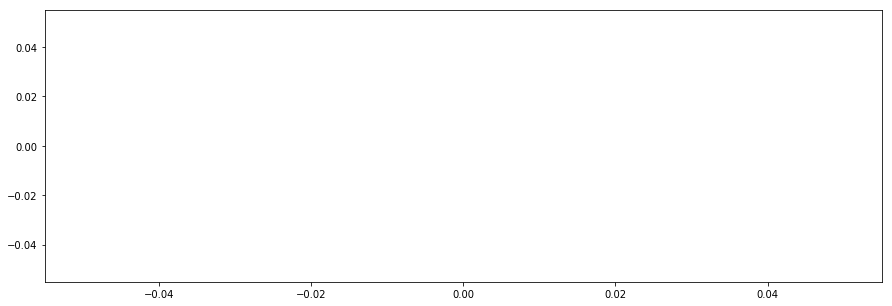

In [11]:
tg2.plot_sample_grid()

In [15]:
tg2.train_params()


initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs


288
288
288


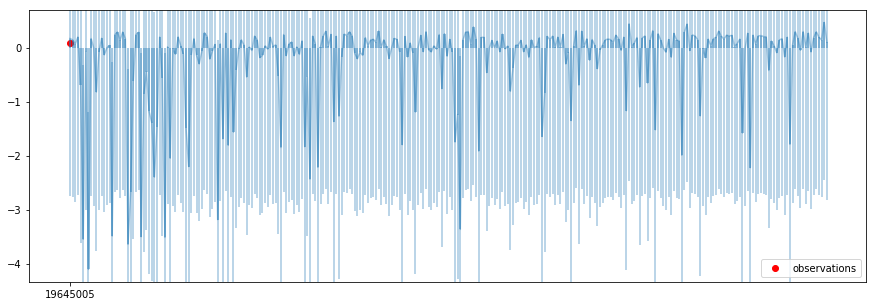

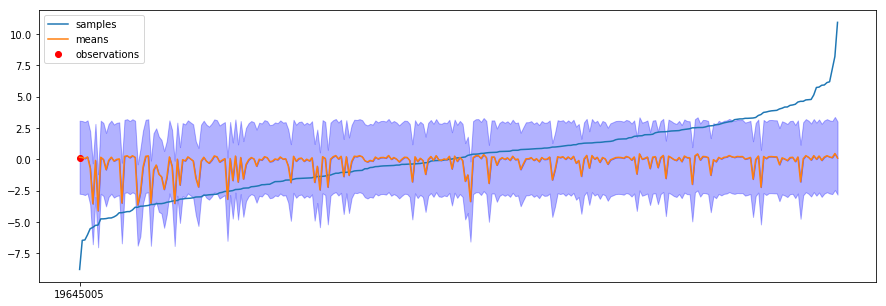

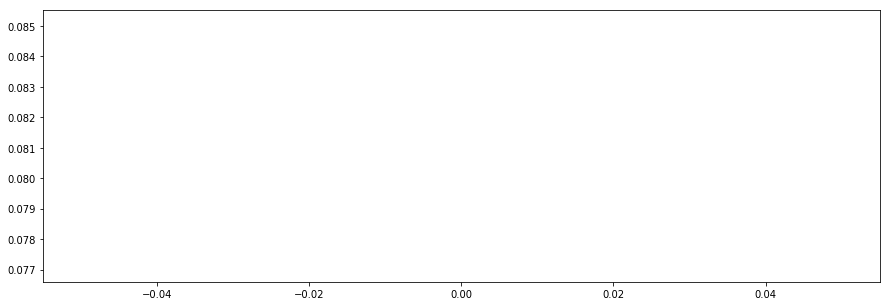

In [16]:
tg2.plot_sample_grid()

In [17]:
tg2.train_params()
tg2.train_params()
tg2.train_params()


initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs


In [18]:
tg2.goforit(5)

initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs


288
288
288


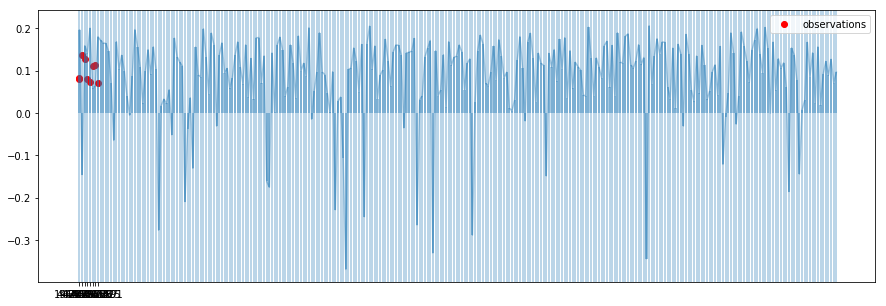

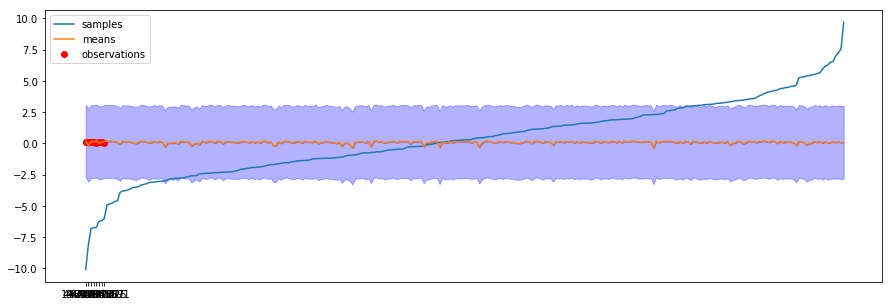

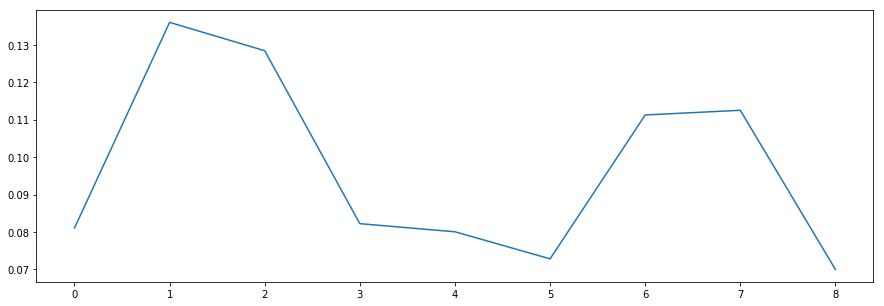

In [19]:
tg2.plot_sample_grid()